In [40]:
from pretty_midi import PrettyMIDI, Instrument, Note
import mido
from mido import MidiFile, MidiTrack, Message
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("dark_background")

In [41]:
def augment_recording(path, tempo=70):
    midi = PrettyMIDI(path)
    midi_first_half = PrettyMIDI(initial_tempo=tempo)
    midi_second_half = PrettyMIDI(initial_tempo=tempo)
    midi_doubled = PrettyMIDI(path)

    length = midi.get_end_time()
    halfway_point = length / 2
    print(f"splitting at {halfway_point}, from {length}")

    for i, instrument in enumerate(midi.instruments):
        inst_fh = Instrument(program=instrument.program, name=instrument.name)
        inst_sh = Instrument(program=instrument.program, name=instrument.name)

        for note in instrument.notes:
            if note.start < halfway_point:
                inst_fh.notes.append(note)
            else:
                new_note = Note(
                    velocity=note.velocity,
                    pitch=note.pitch,
                    start=note.start - halfway_point,
                    end=note.end - halfway_point,
                )
                inst_sh.notes.append(new_note)

            shifted_note = Note(
                velocity=note.velocity,
                pitch=note.pitch,
                start=note.start + length,
                end=note.end + length,
            )
            midi_doubled.instruments[i].notes.append(shifted_note)

        midi_first_half.instruments.append(inst_fh)
        midi_second_half.instruments.append(inst_sh)

    midi_first_half.write("tmp/first_half.mid")
    midi_second_half.write("tmp/second_half.mid")
    midi_doubled.write("tmp/doubled.mid")

    return "tmp/first_half.mid", "tmp/second_half.mid", "tmp/doubled.mid"

In [42]:
# Example usage
files = augment_recording("../inputs/all-fourbar/20240121-070-02_0068-0082_u06.mid")

splitting at 6.856332311363636, from 13.712664622727273


In [43]:
def plot_images(
    images,
    titles,
    save_path,
    shape=None,
    main_title=None,
    set_axis: str = "off",
) -> None:
    """Plot images vertically"""
    num_images = len(images)

    if shape is None:
        shape = [num_images, 1]

    plt.style.use("dark_background")
    plt.figure(figsize=(12, 12))

    if main_title:
        plt.suptitle(main_title)
    for num_plot in range(num_images):
        plt.subplot(shape[0], shape[1], num_plot + 1)
        plt.imshow(
            np.squeeze(images[num_plot]),
            aspect="auto",
            origin="lower",
            cmap="magma",
            interpolation="nearest",
        )
        plt.title(titles[num_plot])
        plt.axis(set_axis)

    plt.tight_layout()
    plt.show()

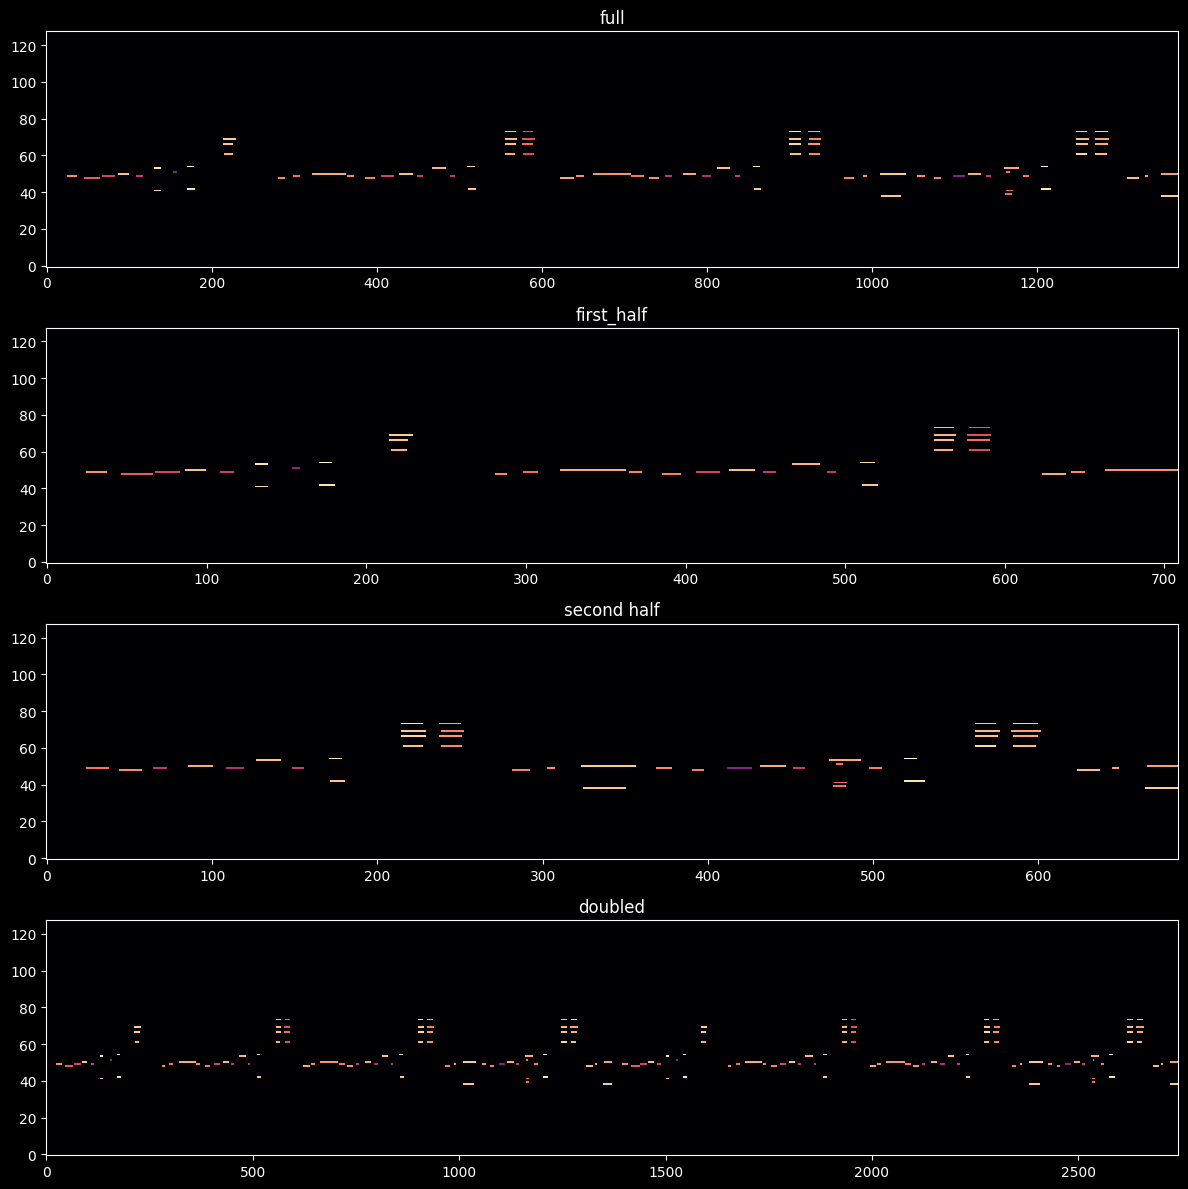

In [44]:
prs = [
    PrettyMIDI(
        "../inputs/all-fourbar/20240121-070-02_0068-0082_u06.mid"
    ).get_piano_roll(),
    PrettyMIDI("tmp/first_half.mid").get_piano_roll(),
    PrettyMIDI("tmp/second_half.mid").get_piano_roll(),
    PrettyMIDI("tmp/doubled.mid").get_piano_roll(),
]
titles = ["full", "first_half", "second half", "doubled"]

plot_images(prs, titles, save_path="tmp", set_axis="on")

In [45]:
with mido.open_output("Disklavier") as output:
    for msg in mido.MidiFile(
        "../inputs/all-fourbar/20240121-070-02_0068-0082_u06.mid"
    ).play():
        output.send(msg)
with mido.open_output("Disklavier") as output:
    for file in files:
        for msg in mido.MidiFile(file).play():
            output.send(msg)

In [49]:
trans_options = [["n00.mid"]] + [[f"u0{i}.mid", f"d0{i}.mid"] for i in range(7)]
[x for sublist in trans_options for x in sublist]

['n00.mid',
 'u00.mid',
 'd00.mid',
 'u01.mid',
 'd01.mid',
 'u02.mid',
 'd02.mid',
 'u03.mid',
 'd03.mid',
 'u04.mid',
 'd04.mid',
 'u05.mid',
 'd05.mid',
 'u06.mid',
 'd06.mid']